# Imports

We'll start this notebook just as any other, with the import statements for all necessary libraries. We'll be using standard libraries: numpy, pandas, matplotlib, seaborn, and sklearn. 

In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)

# Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# IPython utility for inline figure sizing
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale=2)

# Imputing missing values and scaling values
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Load Data

We'll start by loading the data that was split into training and test datasets in the previous notebook. Then we can refresh ourselves on the shapes of these datasets, take a preview of the first few rows, and also replot the distribution of the target variable. 

In [2]:
# Read in training and test dataframes
train_features = pd.read_csv('../data/training_features.csv')
train_labels = pd.read_csv('../data/training_labels.csv')
test_features = pd.read_csv('../data/testing_features.csv')
test_labels = pd.read_csv('../data/testing_labels.csv')

In [3]:
# Print shape of data
print(f'Training Features: {train_features.shape}')
print(f'Training Labels  : {train_labels.shape}')
print(f'Testing Features : {test_features.shape}')
print(f'Testing Labels   : {test_labels.shape}')

Training Features: (5794, 116)
Training Labels  : (5794, 1)
Testing Features : (2484, 116)
Testing Labels   : (2484, 1)


In [4]:
train_features.head()

,Calendar Year,Year Built,Number of Buildings,Occupancy,National Median ENERGY STAR Score,Site EUI (kBtu/ft²),National Median Site EUI (kBtu/ft²),Electricity - Weather Normalized Site Electricity Intensity (Grid and Onsite Renewables) (kWh/ft²),Natural Gas - Weather Normalized Site Natural Gas Intensity (therms/ft²),Green Power - Offsite (kWh),Green Power - Onsite and Offsite (kWh),Percent of Electricity that is Green Power,Multifamily Housing - Percent That Can Be Cooled,Multifamily Housing - Percent That Can Be Heated,"Multifamily Housing - Total Number of Residential Living Units Density (Number per 1,000 sq ft)","Multifamily Housing - Number of Residential Living Units in a High-Rise Building Density (Number per 1,000 sq ft)",Multifamily Housing - Number of Residential Living Units in a Mid-Rise Building (5-9 Stories),"Multifamily Housing - Number of Residential Living Units in a Mid-Rise Building Density (Number per 1,000 sq ft)",Water Use (All Water Sources) (kgal),Indoor Water Use (All Water Sources) (kgal),Number of Active Energy Meters - Total,Number of Active Energy Meters - Used to Compute Metrics,Number of Active Energy Meters - Not Used to Compute Metrics,Number of Active IT Meters,Aggregate Meter(s)-Electric – Number of Individual Meters Included,Aggregate Meter(s)-Natural Gas – Number of Individual Meters Included,Aggregate Meter(s)-District Steam – Number of Individual Meters Included,Latitude,Longitude,Community Board,...,Largest Property Use Type_Outpatient Rehabilitation/Physical Therapy,Largest Property Use Type_Parking,Largest Property Use Type_Performing Arts,"Largest Property Use Type_Personal Services (Health/Beauty, Dry Cleaning, etc.)",Largest Property Use Type_Police Station,Largest Property Use Type_Pre-school/Daycare,Largest Property Use Type_Prison/Incarceration,Largest Property Use Type_Refrigerated Warehouse,"Largest Property Use Type_Repair Services (Vehicle, Shoe, Locksmith, etc.)",Largest Property Use Type_Residence Hall/Dormitory,Largest Property Use Type_Residential Care Facility,Largest Property Use Type_Restaurant,Largest Property Use Type_Retail Store,Largest Property Use Type_Self-Storage Facility,Largest Property Use Type_Senior Living Community,Largest Property Use Type_Single-Family Home,Largest Property Use Type_Social/Meeting Hall,Largest Property Use Type_Stadium (Open),Largest Property Use Type_Strip Mall,Largest Property Use Type_Supermarket/Grocery Store,Largest Property Use Type_Transportation Terminal/Station,Largest Property Use Type_Urgent Care/Clinic/Other Outpatient,Largest Property Use Type_Vehicle Dealership,Largest Property Use Type_Vehicle Repair Services,Largest Property Use Type_Veterinary Office,Largest Property Use Type_Vocational School,Largest Property Use Type_Wastewater Treatment Plant,Largest Property Use Type_Wholesale Club/Supercenter,Largest Property Use Type_Worship Facility,Largest Property Use Type_Zoo
0,2023,1950,1.0,100,50.0,134.6,68.9,13.6,1.0,0.0,0.0,0.0,100.0,100.0,1.09483,0.00000,0.0,0.00000,NaN,NaN,5.0,5.0,0.0,0.0,0.0,0.0,0.0,40.784074,-73.794432,407.0,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2022,1930,1.0,100,50.0,146.6,88.1,10.4,1.1,0.0,0.0,0.0,90.0,100.0,1.29475,0.00000,46.0,1.29475,3196.4,3196.4,7.0,7.0,0.0,0.0,NaN,NaN,NaN,40.727131,-74.003366,102.0,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2023,1910,1.0,100,50.0,72.1,102.8,4.6,0.6,0.0,0.0,0.0,90.0,100.0,1.85621,0.00000,82.0,1.85621,NaN,NaN,19.0,19.0,0.0,0.0,0.0,0.0,0.0,40.742264,-73.979665,106.0,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,2023,1939,1.0,100,50.0,54.6,76

In [5]:
train_features.describe()

,Calendar Year,Year Built,Number of Buildings,Occupancy,National Median ENERGY STAR Score,Site EUI (kBtu/ft²),National Median Site EUI (kBtu/ft²),Electricity - Weather Normalized Site Electricity Intensity (Grid and Onsite Renewables) (kWh/ft²),Natural Gas - Weather Normalized Site Natural Gas Intensity (therms/ft²),Green Power - Offsite (kWh),Green Power - Onsite and Offsite (kWh),Percent of Electricity that is Green Power,Multifamily Housing - Percent That Can Be Cooled,Multifamily Housing - Percent That Can Be Heated,"Multifamily Housing - Total Number of Residential Living Units Density (Number per 1,000 sq ft)","Multifamily Housing - Number of Residential Living Units in a High-Rise Building Density (Number per 1,000 sq ft)",Multifamily Housing - Number of Residential Living Units in a Mid-Rise Building (5-9 Stories),"Multifamily Housing - Number of Residential Living Units in a Mid-Rise Building Density (Number per 1,000 sq ft)",Water Use (All Water Sources) (kgal),Indoor Water Use (All Water Sources) (kgal),Number of Active Energy Meters - Total,Number of Active Energy Meters - Used to Compute Metrics,Number of Active Energy Meters - Not Used to Compute Metrics,Number of Active IT Meters,Aggregate Meter(s)-Electric – Number of Individual Meters Included,Aggregate Meter(s)-Natural Gas – Number of Individual Meters Included,Aggregate Meter(s)-District Steam – Number of Individual Meters Included,Latitude,Longitude,Community Board,Census Tract (2020),log_Largest Property Use Type - Gross Floor Area (ft²),log_Number of Buildings,log_National Median ENERGY STAR Score,log_Natural Gas Use (kBtu),log_Number of Active Energy Meters - Total,log_Number of Active Energy Meters - Used to Compute Metrics,log_Aggregate Meter(s)-Natural Gas – Number of Individual Meters Included,log_Aggregate Meter(s)-District Steam – Number of Individual Meters Included
count,5794.000000,5794.000000,5794.000000,5794.000000,5794.0,5794.000000,5793.000000,5690.000000,5469.000000,5.721000e+03,5.721000e+03,5711.000000,4356.000000,4356.000000,4356.000000,4356.000000,4356.000000,4356.000000,4030.000000,3978.000000,5794.000000,5794.000000,5794.000000,5794.000000,3026.000000,3026.0,3026.0,5637.000000,5637.000000,5637.000000,5637.000000,5794.000000,5782.000000,5.794000e+03,5438.000000,5794.000000,5794.000000,0.0,0.0
mean,2022.522264,1950.655333,1.338971,97.770970,50.0,73.499758,82.756793,6.598243,1.254964,2.272130e+03,3.080751e+03,0.160637,80.695220,96.637739,1.004324,0.210029,43.561804,0.603840,5481.960546,5452.144947,7.731964,7.462720,0.269244,0.003279,0.000330,0.0,0.0,40.750037,-73.935099,231.576370,8733.154337,11.238320,0.071588,3.912023e+00,14.412123,1.806697,1.775164,NaN,NaN
std,0.499547,34.318405,3.901919,9.302789,0.0,32.934575,26.678959,5.190459,7.578390,9.894594e+04,1.009353e+05,3.182885,33.823444,13.073478,0.330730,0.411409,83.947568,0.545369,14037.187756,14086.724595,10.989007,10.695287,1.650969,0.126661,0.018179,0.0,0.0,0.078838,0.060280,116.109391,20665.435885,0.831511,0.368307,4.441275e-16,1.759073,0.626505,0.618835,NaN,NaN
min,2022.000000,1805.000000,0.000000,0.000000,50.0,0.000000,6.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.140470,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,40.509037,-74.244118,101.000000,1.000000,8.715224,0.000000,3.912023e+00,1.791759,0.000000,0.000000,NaN,NaN
25%,2022.000000,1925.000000,1.000000,100.000000,50.0,54.300000,68.300000,3.600000,0.100000,0.000000e+00,0.000000e+00,0.000000,90.000000,100.000000,0.827590,0.000000,0.000000,0.000000,1695.275000,1695.275000,4.000000,4.000000,0.000000,0.000000,0.000000,0.0,0.0,40.698233,-73.976814,108.000000,142.000000,10.628176,0.000000,3.912023e+00,13.733025,1.386294,1.386294,NaN,NaN
50%,2023.000000,1939.000000,1.000000,100.000000,50.0,72.600000,83.200000,4.900000,0.500000,0.000000e+00,0.000000e+00,0.000000,90.000000,100.000000,0.985395,0.000000,32.000000,0.745260,3422.450000,3417.150000,6.00000

Text(0, 0.5, 'Number of Properties')

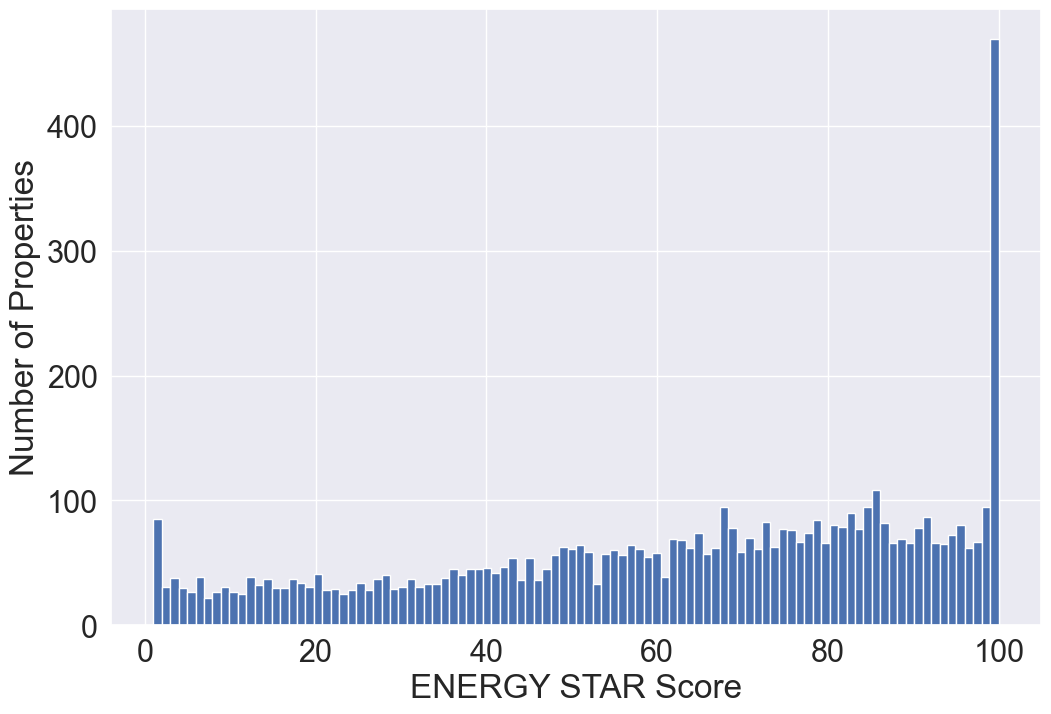

In [6]:
# Plot distribution of Energy Star Scores
fig = plt.figure(figsize=(12,8))
plt.hist(train_labels['ENERGY STAR Score'], bins=100)
plt.xlabel('ENERGY STAR Score')
plt.ylabel('Number of Properties')

# Missing Values

In the EDA notebook, we took care of some missing values by eliminating columsn that had over 50% missing data. Still, we are left with missing information in the remaining columns. Furthermore, we added additional columns into the dataset after this cleanup-process. It will be helpful to remake the missing columns figure, and really understand what data is missing, and how much of it. Based on these factors, we'll decide whether or not we want to impute missing figures, or remove relevant rows and columns. 

We'll start by plotting a distribution of columns based on the % of their missing data.

Dataframe has 116 columns.
25 columns have missing information.
                                                    Missing Values  % of Total
log_Aggregate Meter(s)-Natural Gas – Number of ...            5794  100.000000
log_Aggregate Meter(s)-District Steam – Number ...            5794  100.000000
Aggregate Meter(s)-District Steam – Number of I...            2768   47.773559
Aggregate Meter(s)-Natural Gas – Number of Indi...            2768   47.773559
Aggregate Meter(s)-Electric – Number of Individ...            2768   47.773559
...                                                            ...         ...
Largest Property Use Type_Financial Office                       0    0.000000
Largest Property Use Type_Fast Food Restaurant                   0    0.000000
Largest Property Use Type_Enclosed Mall                          0    0.000000
Largest Property Use Type_Distribution Center                    0    0.000000
Largest Property Use Type_Zoo                                    0 

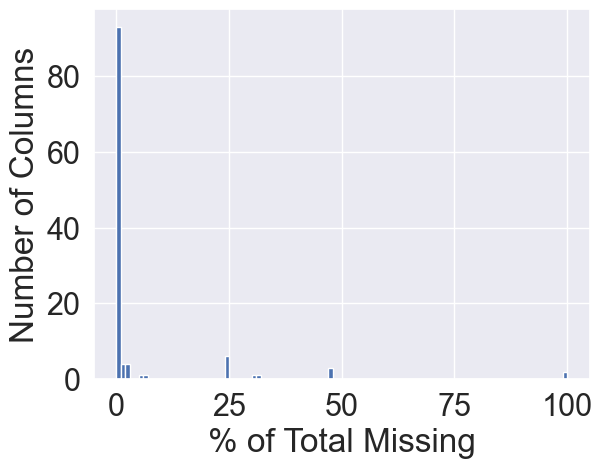

In [7]:
def missing_values(df):
    # total missing values per column
    total_missing = df.isnull().sum()

    # percentage of missing values
    percent_missing = 100* (total_missing / len(df))

    # missing value table
    table = pd.concat([total_missing, percent_missing], axis=1)

    # rename the columns
    table = table.rename(
        columns = {0: 'Missing Values', 1: '% of Total'}
    )

    # sort by percentage, descending
    table = table.sort_values(by='% of Total', ascending=False)

    # print summmary information
    print(f"Dataframe has {df.shape[1]} columns.")
    print(f"{len(table[table['% of Total']!=0])} columns have missing information.")

    return table

missing_data_table = missing_values(train_features)

fig = plt.figure()
missing_data_table['% of Total'].hist(bins=100)
plt.xlabel('% of Total Missing')
plt.ylabel('Number of Columns')

print(missing_data_table)

Bin sizes in the figure above are equivalent to 1%. There is a small peak at 100%, and the other (visible) bars are all below 50%. A column with 100% missing data gives us no new information, so we'll filter out these columns and remove them from both the training dataset and test dataset. This is important as we want to keep the features identical between these datasets.

In [8]:
# Get list of column names that have 100% missing values
columns_to_drop = list(missing_data_table[missing_data_table['% of Total']==100].index)
print("Dropping the following columns:")
for each in columns_to_drop:
    print(each)

# Drop from training and test datasets 
train_features = train_features.drop(columns_to_drop, axis=1)
test_features = test_features.drop(columns_to_drop, axis=1)

# # We'll also drop the national median column
# columns_to_drop = ['National Median Site EUI (kBtu/ft²)']
                                            
# # Drop from training and test datasets 
# train_features = train_features.drop(columns_to_drop, axis=1)
# test_features = test_features.drop(columns_to_drop, axis=1)

Dropping the following columns:
log_Aggregate Meter(s)-Natural Gas – Number of Individual Meters Included
log_Aggregate Meter(s)-District Steam – Number of Individual Meters Included


Dataframe has 114 columns.
23 columns have missing information.


Text(0, 0.5, 'Number of Columns')

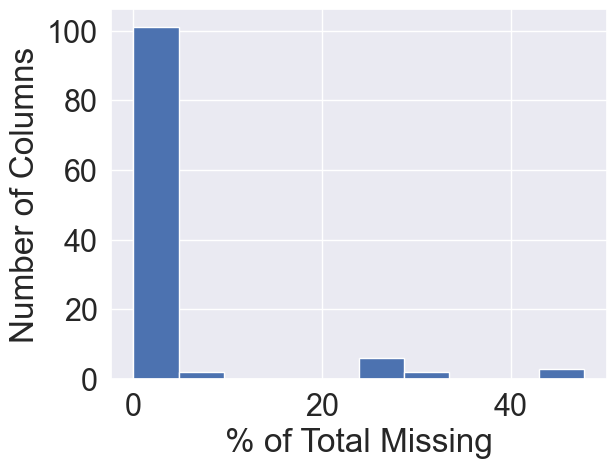

In [9]:
missing_data_table = missing_values(train_features)

fig = plt.figure()
missing_data_table['% of Total'].hist()
plt.xlabel('% of Total Missing')
plt.ylabel('Number of Columns')

In [10]:
print(missing_data_table[missing_data_table['% of Total']>0])

                                                    Missing Values  % of Total
Aggregate Meter(s)-District Steam – Number of I...            2768   47.773559
Aggregate Meter(s)-Natural Gas – Number of Indi...            2768   47.773559
Aggregate Meter(s)-Electric – Number of Individ...            2768   47.773559
Indoor Water Use (All Water Sources) (kgal)                   1816   31.342768
Water Use (All Water Sources) (kgal)                          1764   30.445288
Multifamily Housing - Number of Residential Liv...            1438   24.818778
Multifamily Housing - Percent That Can Be Cooled              1438   24.818778
Multifamily Housing - Number of Residential Liv...            1438   24.818778
Multifamily Housing - Number of Residential Liv...            1438   24.818778
Multifamily Housing - Total Number of Residenti...            1438   24.818778
Multifamily Housing - Percent That Can Be Heated              1438   24.818778
log_Natural Gas Use (kBtu)                          

In [11]:
column_name = 'Aggregate Meter(s)-District Steam – Number of Individual Meters Included'
print(train_features[column_name].describe())
print(train_features[column_name].head(10))

column_name = 'Aggregate Meter(s)-Electric – Number of Individual Meters Included'
print(train_features[column_name].describe())
print(train_features[column_name].head(10))

column_name = 'Aggregate Meter(s)-Natural Gas – Number of Individual Meters Included'
print(train_features[column_name].describe())
print(train_features[column_name].head(10))

count    3026.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: Aggregate Meter(s)-District Steam – Number of Individual Meters Included, dtype: float64
0    0.0
1    NaN
2    0.0
3    0.0
4    NaN
5    0.0
6    0.0
7    NaN
8    0.0
9    NaN
Name: Aggregate Meter(s)-District Steam – Number of Individual Meters Included, dtype: float64
count    3026.000000
mean        0.000330
std         0.018179
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Aggregate Meter(s)-Electric – Number of Individual Meters Included, dtype: float64
0    0.0
1    NaN
2    0.0
3    0.0
4    NaN
5    0.0
6    0.0
7    NaN
8    0.0
9    NaN
Name: Aggregate Meter(s)-Electric – Number of Individual Meters Included, dtype: float64
count    3026.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: Aggregate Meter(s)-Nat

All three of the aggregate columns above hold no information--they only store 0s and NaNs. The 'Electric' column is an exception, as it does have a nonzero maximum value, but given that the 0th percentil through the 75th percentile are all storing 0, I conclude that there is no useful information in this column. We'll drop all three from both training and test datasets.

In [12]:
# drop aggregate columns since they hold no information
columns_to_drop = [
    'Aggregate Meter(s)-District Steam – Number of Individual Meters Included',
    'Aggregate Meter(s)-Electric – Number of Individual Meters Included',
    'Aggregate Meter(s)-Natural Gas – Number of Individual Meters Included' 
]
train_features = train_features.drop(columns_to_drop, axis=1)
test_features = test_features.drop(columns_to_drop, axis=1)

print(train_features.shape)
print(test_features.shape)

(5794, 111)
(2484, 111)


The next column down in the list of features with missing data is indoor water use. We'll start with some summary statistics.

In [13]:
# Get updated list of columns with missing data
missing_data_table = missing_values(train_features)

missing_data_columns = list(missing_data_table.index)

train_features[missing_data_columns].describe()

Dataframe has 111 columns.
20 columns have missing information.


,Indoor Water Use (All Water Sources) (kgal),Water Use (All Water Sources) (kgal),"Multifamily Housing - Number of Residential Living Units in a High-Rise Building Density (Number per 1,000 sq ft)",Multifamily Housing - Number of Residential Living Units in a Mid-Rise Building (5-9 Stories),"Multifamily Housing - Total Number of Residential Living Units Density (Number per 1,000 sq ft)",Multifamily Housing - Percent That Can Be Heated,Multifamily Housing - Percent That Can Be Cooled,"Multifamily Housing - Number of Residential Living Units in a Mid-Rise Building Density (Number per 1,000 sq ft)",log_Natural Gas Use (kBtu),Natural Gas - Weather Normalized Site Natural Gas Intensity (therms/ft²),Latitude,Longitude,Community Board,Census Tract (2020),Electricity - Weather Normalized Site Electricity Intensity (Grid and Onsite Renewables) (kWh/ft²),Percent of Electricity that is Green Power,Green Power - Onsite and Offsite (kWh),Green Power - Offsite (kWh),log_Number of Buildings,National Median Site EUI (kBtu/ft²),Calendar Year,log_Number of Active Energy Meters - Used to Compute Metrics,log_Number of Active Energy Meters - Total,log_National Median ENERGY STAR Score,log_Largest Property Use Type - Gross Floor Area (ft²),Number of Active IT Meters,Number of Active Energy Meters - Not Used to Compute Metrics,Number of Active Energy Meters - Used to Compute Metrics,Number of Active Energy Meters - Total,Site EUI (kBtu/ft²),National Median ENERGY STAR Score,Occupancy,Number of Buildings,Year Built
count,3978.000000,4030.000000,4356.000000,4356.000000,4356.000000,4356.000000,4356.000000,4356.000000,5438.000000,5469.000000,5637.000000,5637.000000,5637.000000,5637.000000,5690.000000,5711.000000,5.721000e+03,5.721000e+03,5782.000000,5793.000000,5794.000000,5794.000000,5794.000000,5.794000e+03,5794.000000,5794.000000,5794.000000,5794.000000,5794.000000,5794.000000,5794.0,5794.000000,5794.000000,5794.000000
mean,5452.144947,5481.960546,0.210029,43.561804,1.004324,96.637739,80.695220,0.603840,14.412123,1.254964,40.750037,-73.935099,231.576370,8733.154337,6.598243,0.160637,3.080751e+03,2.272130e+03,0.071588,82.756793,2022.522264,1.775164,1.806697,3.912023e+00,11.238320,0.003279,0.269244,7.462720,7.731964,73.499758,50.0,97.770970,1.338971,1950.655333
std,14086.724595,14037.187756,0.411409,83.947568,0.330730,13.073478,33.823444,0.545369,1.759073,7.578390,0.078838,0.060280,116.109391,20665.435885,5.190459,3.182885,1.009353e+05,9.894594e+04,0.368307,26.678959,0.499547,0.618835,0.626505,4.441275e-16,0.831511,0.126661,1.650969,10.695287,10.989007,32.934575,0.0,9.302789,3.901919,34.318405
min,0.000000,0.000000,0.000000,0.000000,0.140470,0.000000,0.000000,0.000000,1.791759,0.000000,40.509037,-74.244118,101.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,6.000000,2022.000000,0.000000,0.000000,3.912023e+00,8.715224,0.000000,0.000000,1.000000,1.000000,0.000000,50.0,0.000000,0.000000,1805.000000
25%,1695.275000,1695.275000,0.000000,0.000000,0.827590,100.000000,90.000000,0.000000,13.733025,0.100000,40.698233,-73.976814,108.000000,142.000000,3.600000,0.000000,0.000000e+00,0.000000e+00,0.000000,68.300000,2022.000000,1.386294,1.386294,3.912023e+00,10.628176,0.000000,0.000000,4.000000,4.000000,54.300000,50.0,100.000000,1.000000,1925.000000
50%,3417.150000,3422.450000,0.000000,32.000000,0.985395,100.000000,90.000000,0.745260,14.859752,0.500000,40.752424,-73.948413,207.000000,295.000000,4.900000,0.000000,0.000000e+00,0.000000e+00,0.000000,83.200000,2023.000000,1.791759,1.791759,3.912023e+00,11.082143,0.000000,0.000000,6.000000,6.000000,72.600000,50.0,100.000000,1.000000,1939.000000
75%,5989.425000,6026.400000,0.071875,60.000000,1.166505,100.000000,100.000000,1.024190,15.435082,0.700000,40.815373,-73.901956,314.000000,1502.000000,7.900000,0.000000,0.000000e+00,0.000000e+00,0.000000,94.700000,2023.000000,2.079442,2.197225,3.912023e+00,11.698699,0.000000,0.000000,8.000000,9.000000,90.675000,50.0,100.000000,1.000000,1972.000000
max,637491.900

Most columns in the summary stats above hold meaningful values. We can infer this based on the fact that many have nonzero figures in the mean, std, and percentile values. Still, some columns such as `Green Power - Offsite (kWh)` have a value of 0 at the 75th percentile, and a value on the order of 10^7 as their maximum, which suggests that column is mostly empty (i.e.) with the exception of some outlier(s). Rather than clean the rest of these columns manually, we will create a simple imputer with Scikit-learn to fill missing values with the median of the column. In this way, if a column is mostly populated with 0s, then the imputer will likely miss filling values in as 0. We expect these columns to be dropped when optimizing feature selection for our ML model. 

In [14]:
# Now save the files
train_features.to_csv('../data/training_features_cleaned.csv', index=False)
test_features.to_csv('../data/testing_features_cleaned.csv', index=False)
train_labels.to_csv('../data/training_labels_cleaned.csv', index=False)
test_labels.to_csv('../data/testing_labels_cleaned.csv', index=False)

In [15]:
# Create an imputer object with a median filling strategy
imputer = SimpleImputer(strategy='median')

# Fit on the training features
imputer.fit(train_features)

# Transform both training and testing data
X = imputer.transform(train_features)
X_test = imputer.transform(test_features)

Let's do a quick sanity check to make sure there are no more missing cells.

In [16]:
print('Missing values in training features: ', np.sum(np.isnan(X)))
print('Missing values in testing features:  ', np.sum(np.isnan(X_test)))

Missing values in training features:  0
Missing values in testing features:   0


We can also check that all values are finite, meaning there are no cases of infinity or NaN. This next cell prints two arrays that check for non-finite values in both the training and test datasets, respectively. Both arrays should be empty, which means we have only finite values.

In [17]:
# Make sure all values are finite
print(np.where(~np.isfinite(X)))
print(np.where(~np.isfinite(X_test)))

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))


After imputation, all of the features are real-valued. For more sophisticated methods of imputation (although median values usually works well) check out [this article](https://www.tandfonline.com/doi/full/10.1080/1743727X.2014.979146)

# Scaling Features

The final step to take before we can build our models is to [scale the features](https://en.wikipedia.org/wiki/Feature_scaling). This is necessary because features are in different units, and we want to normalize the features so the units do not affect the algorithm. [Linear Regression and Random Forest do not require feature scaling](https://stats.stackexchange.com/questions/121886/when-should-i-apply-feature-scaling-for-my-data), but other methods, such as support vector machines and k nearest neighbors, do require it because they take into account the Euclidean distance between observations. For this reason, it is a best practice to scale features when we are comparing multiple algorithms. 

There are two ways to [scale features](http://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html):

1. Z-score standardization: for each value, subtract the mean of the feature and divide by the standard deviation of the feature. The z-score tell sus how many standard deviations a point is from its mean. A value with a z-score of 0 is exactly at the mean. A value of +1 is +1 standard deviations away from the mean. This results in each feature having a mean of 0 and a standard deviation of 1.
2. Min-max normalization: for each value, subtract the minimum value of the feature and divide by the maximum minus the minimum for the feature (the range). This assures that all the values for a feature are between 0 and 1.

Here is a good article about [normalization and standardization](https://machinelearningmastery.com/normalize-standardize-machine-learning-data-weka/).

As with imputation, when we train the scaling object, we want to use only the training set. When we transform features, we will transform both the training set and the testing set.

In [18]:
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X)

# Transform both the training and testing data
X = scaler.transform(X)
X_test = scaler.transform(X_test)

In [19]:
# Convert y to one-dimensional array (vector)
y = np.array(train_labels).reshape((-1, ))
y_test = np.array(test_labels).reshape((-1, ))

# Models to Evaluate

We will compare five different machine learning models using the great [Scikit-Learn library](http://scikit-learn.org/stable/):

1. Linear Regression
2. Support Vector Machine Regression
3. Random Forest Regression
4. Gradient Boosting Regression
5. K-Nearest Neighbors Regression

For each model, I will use three types of loss functions:

- mean absolute error (MAE)
- mean squared error (MSE)
- Huber loss

Again, here I'm focusing on implementation rather than explaining how these work. In addition to Hands-On Machine Learning, another great resource (this one is free online) for reading about machine learning models is [An Introduction to Statistical Learning](https://www.statlearning.com/).

To compare the models, we are going to be mostly using the Scikit-Learn defaults for the model hyperparameters. Generally these will perform decently, but should be optimized before actually using a model. At first, we just want to determine the baseline performance of each model, and then we can select the best performing model for further optimization using hyperparameter tuning. Remember that the default hyperparameters will get a model up and running, but nearly always should be adjusted using some sort of search to find the best settings for your problem. 

Here is what the Scikit-learn documentation [says about the defaults](https://arxiv.org/abs/1309.0238):

    __Sensible defaults__: Whenever an operation requires a user-defined parameter,
    an appropriate default value is defined by the library. The default value
    should cause the operation to be performed in a sensible way (giving a baseline
    solution for the task at hand.)

One of the best parts about scikit-learn is that all models are implemented in an identical manner: once you know how to build one, you can implement an extremely diverse array of models. Here we will implement the entire training and testing procedures for a number of models in just a few lines of code.

In [20]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    """
    Calculates the Mean Absolute Error.

    Args:
        y_true (np.ndarray): True values.
        y_pred (np.ndarray): Predicted values.

    Returns:
        float: Mean Absolute Error.
    """    
    return np.mean(abs(y_true - y_pred))

# Function to calculate mean squared error
def mse(y_true, y_pred):
    """
    Calculates the Mean Squared Error.

    Args:
        y_true (np.ndarray): True values.
        y_pred (np.ndarray): Predicted values.

    Returns:
        float: Mean Squared Error.
    """    
    squared_errors = (np.array(y_true) - np.array(y_pred)) ** 2
    return np.mean(squared_errors)

# Function to calculate Huber loss
def huber_loss(y_true, y_pred, delta=1.0):
    """
    Calculates the Huber loss.

    Args:
        y_true (np.ndarray): True values.
        y_pred (np.ndarray): Predicted values.
        delta (float): Threshold parameter.

    Returns:
        float: Huber loss value.
    """

    loss = 0

    if (len(y_true) != len(y_pred)):
        print("ERROR: length of y_pred and y_true must be equivalent.")

    for i in range(len(y_true)):
      a = y_true[i] - y_pred[i]
      if np.abs(a) <= delta:
          loss += 0.5*(a**2)
      else:
          loss += delta * ( np.abs(a) - 0.5 * delta )
    
    return loss/len(y_pred)

# Takes in a model, trains the model and evaluates
# the model on the test set based on the provided loss
def fit_and_evaluate(model, loss_function):
    
    # Train the model
    model.fit(X, y)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_loss = loss_function(y_test, model_pred)
    
    # Return the performance metric
    return model_loss

# Linear Regression

In [21]:
lr = LinearRegression()
lr_mse = fit_and_evaluate(lr, mse)
lr_mae = fit_and_evaluate(lr, mae)
lr_hub = fit_and_evaluate(lr, huber_loss)

print('Linear Regression Performance on the test set: MSE = %0.4f' % lr_mse)
print('Linear Regression Performance on the test set: MAE = %0.4f' % lr_mae)
print('Linear Regression Performance on the test set: HUB = %0.4f' % lr_hub)

Linear Regression Performance on the test set: MSE = 1521.7395
Linear Regression Performance on the test set: MAE = 10.3652
Linear Regression Performance on the test set: HUB = 9.8762


# Support Vector Machines

In [22]:
svm = SVR(C = 1000, gamma = 0.1)
svm_mae = fit_and_evaluate(svm, mae)

print('Support Vector Machine Regression Performance on the test set: MAE = %0.4f' % svm_mae)

Support Vector Machine Regression Performance on the test set: MAE = 6.4772


In [23]:
svm = SVR(C = 1000, gamma = 0.1)
svm_mse = fit_and_evaluate(svm, mse)

print('Support Vector Machine Regression Performance on the test set: MSE = %0.4f' % svm_mse)

Support Vector Machine Regression Performance on the test set: MSE = 160.8143


In [24]:
svm = SVR(C = 1000, gamma = 0.1)
svm_hub = fit_and_evaluate(svm, huber_loss)

print('Support Vector Machine Regression Performance on the test set: HUB = %0.4f' % svm_hub)

Support Vector Machine Regression Performance on the test set: HUB = 6.0027


# Random Forest

In [25]:
random_forest = RandomForestRegressor(random_state=60)
random_forest_mae = fit_and_evaluate(random_forest, mae)

print('Random Forest Regression Performance on the test set: MAE = %0.4f' % random_forest_mae)

Random Forest Regression Performance on the test set: MAE = 1.5994


In [26]:
random_forest = RandomForestRegressor(random_state=60)
random_forest_mse = fit_and_evaluate(random_forest, mse)

print('Random Forest Regression Performance on the test set: MSE = %0.4f' % random_forest_mse)

Random Forest Regression Performance on the test set: MSE = 7.2055


In [27]:
random_forest = RandomForestRegressor(random_state=60)
random_forest_hub = fit_and_evaluate(random_forest, huber_loss)

print('Random Forest Regression Performance on the test set: HUB = %0.4f' % random_forest_hub)

Random Forest Regression Performance on the test set: HUB = 1.2179


# Gradient Boosted Regression

In [28]:
gradient_boosted = GradientBoostingRegressor(random_state=60)
gradient_boosted_mae = fit_and_evaluate(gradient_boosted, mae)

print('Gradient Boosted Regression Performance on the test set: MAE = %0.4f' % gradient_boosted_mae)

Gradient Boosted Regression Performance on the test set: MAE = 2.8797


In [29]:
gradient_boosted = GradientBoostingRegressor(random_state=60)
gradient_boosted_mse = fit_and_evaluate(gradient_boosted, mse)

print('Gradient Boosted Regression Performance on the test set: MSE = %0.4f' % gradient_boosted_mse)

Gradient Boosted Regression Performance on the test set: MSE = 16.6246


In [30]:
gradient_boosted = GradientBoostingRegressor(random_state=60)
gradient_boosted_hub = fit_and_evaluate(gradient_boosted, huber_loss)

print('Gradient Boosted Regression Performance on the test set: HUB = %0.4f' % gradient_boosted_hub)

Gradient Boosted Regression Performance on the test set: HUB = 2.4256


# K-Nearest Neighbors

In [31]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_mse = fit_and_evaluate(knn, mse)

print('K-Nearest Neighbors Regression Performance on the test set: MSE = %0.4f' % knn_mse)

K-Nearest Neighbors Regression Performance on the test set: MSE = 353.6915


In [32]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn, mae)

print('K-Nearest Neighbors Regression Performance on the test set: MAE = %0.4f' % knn_mae)

K-Nearest Neighbors Regression Performance on the test set: MAE = 14.9487


In [33]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_hub = fit_and_evaluate(knn, huber_loss)

print('K-Nearest Neighbors Regression Performance on the test set: HUB = %0.4f' % knn_hub)

K-Nearest Neighbors Regression Performance on the test set: HUB = 14.4588


# Model Comparisons

Below there is a bar plot that shows the performance across all model types and loss functions. 

Text(0.5, 1.0, 'Model Comparison on Test MAE')

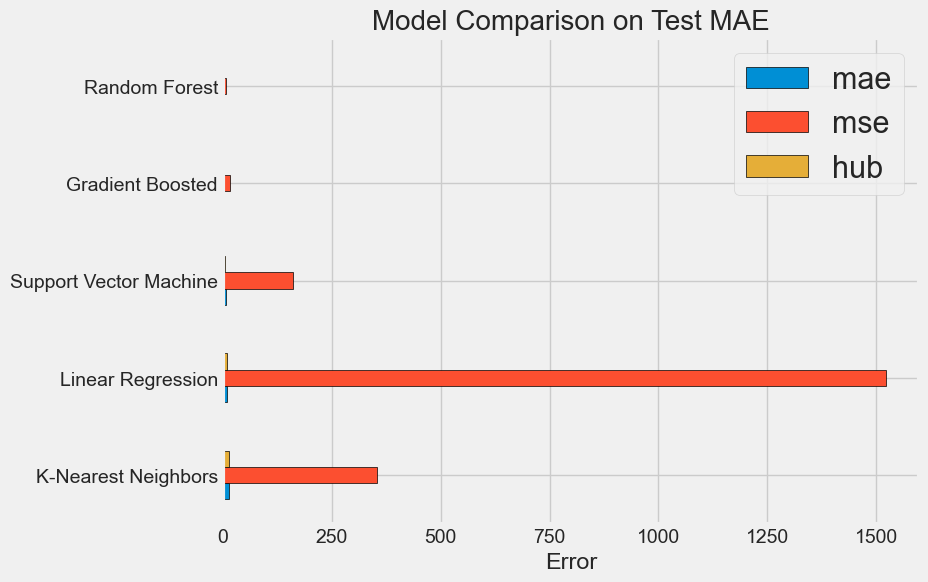

In [34]:
plt.style.use('fivethirtyeight')
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors'],
                                 'mae': [lr_mae, svm_mae, random_forest_mae, 
                                         gradient_boosted_mae, knn_mae],
                                 'mse': [lr_mse, svm_mse, random_forest_mse, 
                                         gradient_boosted_mse, knn_mse],
                                 'hub': [lr_hub, svm_hub, random_forest_hub, 
                                         gradient_boosted_hub, knn_hub],
                                         })

# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(
    x = 'model', y = ['mae','mse','hub'], kind = 'barh', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Error'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20)

Since the MSE errors are significantly larger than those from the MAE and Huber loss functions, we'll remake this plot and omit MSE--it is too sensitive to outliers in this dataset to be a reasonable choice.

Text(0.5, 1.0, 'Model Comparison on Test MAE')

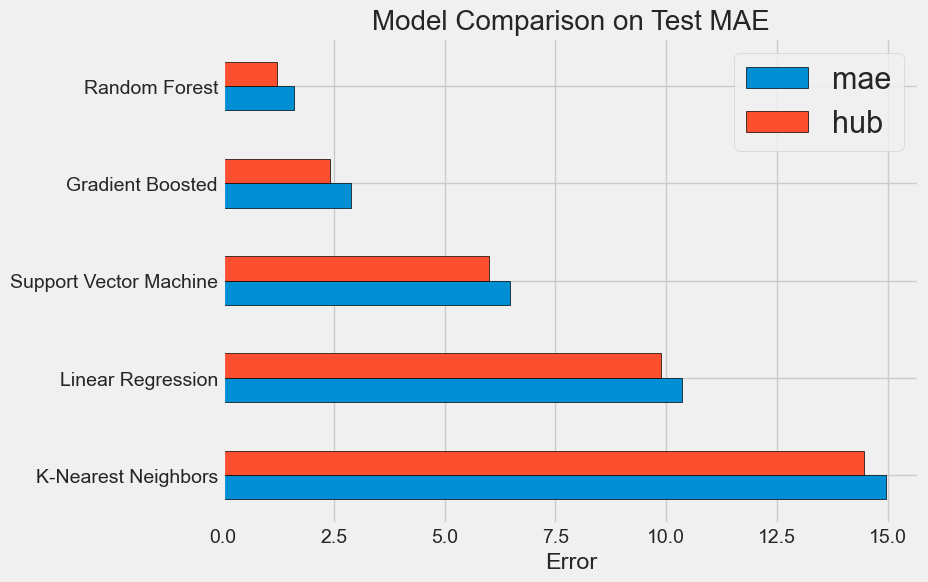

In [35]:
plt.style.use('fivethirtyeight')
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors'],
                                 'mae': [lr_mae, svm_mae, random_forest_mae, 
                                         gradient_boosted_mae, knn_mae],
                                 'mse': [lr_mse, svm_mse, random_forest_mse, 
                                         gradient_boosted_mse, knn_mse],
                                 'hub': [lr_hub, svm_hub, random_forest_hub, 
                                         gradient_boosted_hub, knn_hub],
                                         })

# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(
    x = 'model', y = ['mae','hub'], kind = 'barh', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Error'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20)

Remember that this compares all of these models with their default hyperparameter settings. The SVM method in particular varies a lot with hyperparameter tuning and thus it may not be a fair comparison against other models with default settings.

In [36]:
# Define the parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

# Initialize GridSearchCV
grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=2, scoring='neg_mean_absolute_error', cv=2)

# Fit the grid search to the data
grid.fit(X, y)

# Print the best parameters and best score
print("Best Parameters:", grid.best_params_)
print("Best Score:", -grid.best_score_)

# Evaluate the best model on the test set
best_svm = grid.best_estimator_
svm_mae = fit_and_evaluate(best_svm, mae)
print('Optimized SVM Performance on the test set: MAE = %0.4f' % svm_mae)

Fitting 2 folds for each of 25 candidates, totalling 50 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   1.2s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   1.1s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   1.2s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   1.2s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   1.1s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   1.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   1.1s
[CV] END ...........................C=1, gamma=1

Text(0.5, 1.0, 'Model Comparison on Test MAE')

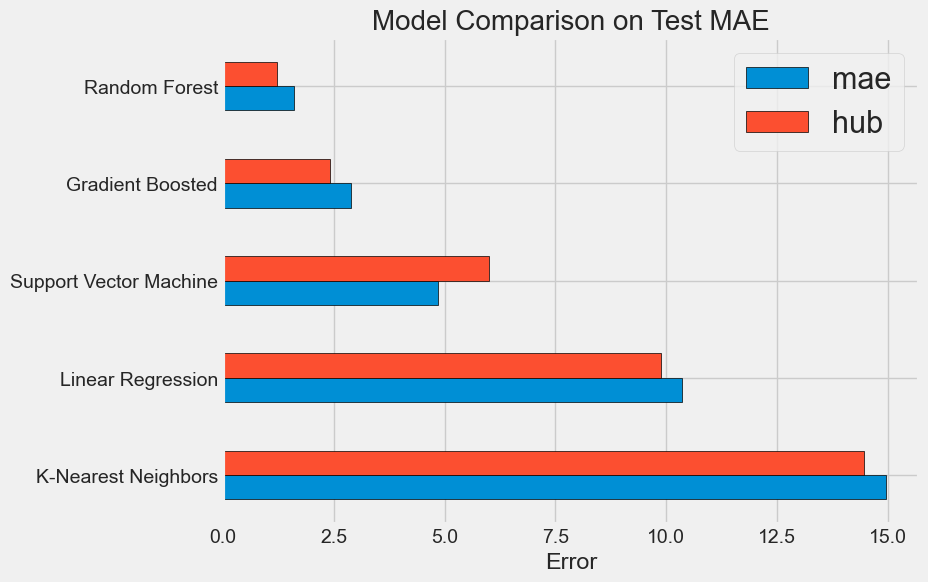

In [37]:
plt.style.use('fivethirtyeight')
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Support Vector Machine',
                                           'Random Forest', 'Gradient Boosted',
                                            'K-Nearest Neighbors'],
                                 'mae': [lr_mae, svm_mae, random_forest_mae, 
                                         gradient_boosted_mae, knn_mae],
                                 'mse': [lr_mse, svm_mse, random_forest_mse, 
                                         gradient_boosted_mse, knn_mse],
                                 'hub': [lr_hub, svm_hub, random_forest_hub, 
                                         gradient_boosted_hub, knn_hub],
                                         })

# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(
    x = 'model', y = ['mae','hub'], kind = 'barh', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Error'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20)

After a simplistic attempt at hyperparameter turning for the SVM (only for MAE), we were able to decrease the MAE error, but no so much as to change its ranking in terms of performance. Both Random Forest and Gradient-Boosted models are reasonable choices to proceed with ML. I'll arbitrarily pick the Gradient Boosted model. From here, I am going to concentrate on optimizing this model with yperparamter tuning. 

Note: The gradient-boosted model is the Scikit-Learn implementation of [Gradient Boosted Trees](http://www.ccs.neu.edu/home/vip/teach/MLcourse/4_boosting/slides/gradient_boosting.pdf) which has won many [Kaggle competitions](http://matthewemery.ca/Why-Kagglers-Love-XGBoost/) in the past few years. The Scikit-Learn version is generally slower than the `XGBoost` version, but here we'll stick to Scikit-Learn because the syntax is more familiar. [Here's a guide](https://www.kaggle.com/dansbecker/learning-to-use-xgboost/code) to using the implementation in the `XGBoost` package.

# Model Optimization 

In machine learning, optimizing a model means finding the best set of hyperparameters for a particular problem. 

## Hyperparameters

First off, we need to understand what [model hyperparameters are in contrast to model parameters](https://machinelearningmastery.com/difference-between-a-parameter-and-a-hyperparameter/) :

* Model __hyperparameters__ are best thought of as settings for a machine learning algorithm that are tuned by the data scientist before training. Examples would be the number of trees in the random forest, or the number of neighbors used in K Nearest Neighbors Regression. 
* Model __parameters__ are what the model learns during training, such as the weights in the linear regression.

We as data scientists control a model by choosing the hyperparameters, and these choices can have a significant effect on the final performance of the model (although usually not as great of an effect as getting more data or engineering features). 

[Tuning the model hyperparameters](http://scikit-learn.org/stable/modules/grid_search.html) controls the balance of under vs over fitting in a model. We can try to correct for under-fitting by making a more complex model, such as using more trees in a random forest or more layers in a deep neural network. A model that underfits has high bias, and occurs when our model does not have enough capacity (degrees of freedom) to learn the relationship between the features and the target. We can try to correct for overfitting by limiting the complexity of the model and applying regularization. This might mean decreasing the degree of a polynomial regression, or adding dropout layers to a deep neural network. A model that overfits has high variance and in effect has memorized the training set. Both underfitting and overfitting lead to poor generalization performance on the test set. 

The problem with choosing the hyperparameters is that no set will work best across all problems. Therefore, for every new dataset, we have to find the best settings. This can be a time-consuming process, but luckily there are several options for performing this procedure in Scikit-Learn. Even better, new libraries, such as [TPOT](https://epistasislab.github.io/tpot/) by epistasis labs, is aiming to do this process automatically for you! For now, we will stick to doing this manually (sort of) in Scikit-Learn, but stay tuned for an article on automatic model selection! 

## Hyperparameter Tuning with Random Search and Cross Validation

We can choose the best hyperparameters for a model through random search and cross validation. 

* Random search refers to the method in which we choose hyperparameters to evaluate: we define a range of options, and then randomly select combinations to try. This is in contrast to grid search which evaluates every single combination we specify. Generally, random search is better when we have limited knowledge of the best model hyperparameters and we can use random search to narrow down the options and then use grid search with a more limited range of options. 
* Cross validation is the method used to assess the performance of the hyperparameters. Rather than splitting the training set up into separate training and validation sets which reduces the amount of training data we can use, we use K-Fold Cross Validation. This means dividing the training data into K folds, and then going through an iterative process where we first train on K-1 of the folds and then evaluate performance on the kth fold. We repeat this process K times so eventually we will have tested on every example in the training data with the key that each iteration we are testing on data that we __did not train on__.  At the end of K-fold cross validation, we take the average error on each of the K iterations as the final performance measure and then train the model on all the training data at once. The performance we record is then used to compare different combinations of hyperparameters. 

Here we will implement random search with cross validation to select the optimal hyperparameters for the gradient boosting regressor. We first define a grid then peform an iterative process of: randomly sample a set of hyperparameters from the grid, evaluate the hyperparameters using 4-fold cross-validation, and then select the hyperparameters with the best performance. 

Of course we don't actually do this iteration ourselves, we let Scikit-Learn and `RandomizedSearchCV` do the process for us! 

In [38]:
# Valid loss functions for GradientBoostingRegressor (modern scikit-learn)
loss = ['squared_error', 'absolute_error', 'huber']  # updated from 'ls' and 'lad'

# Number of trees used in the boosting process
n_estimators = [100, 500, 900, 1100, 1500]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ['sqrt', 'log2', None]  # 'auto' is not valid for regressors

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'loss': loss,
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'max_features': max_features
}

We selected 6 different hyperparameters to tune in the gradient boosting regressor. These all will affect the model in different ways that are hard to determine ahead of time, and the only method for finding the best combination for a specific problem is to test them out! To read about the hyperparameters, I suggest taking a look at the [Scikit-Learn documentation](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor). For now, just know that we are trying to find the best combination of hyperparameters and because there is no theory to tell us which will work best, we just have to evaluate them, like runnning an experiment! 

In the code below, we create the Randomized Search Object passing in the following parameters:

* `estimator`: the model
* `param_distributions`: the distribution of parameters we defined
* `cv` the number of folds to use for k-fold cross validation
* `n_iter`: the number of different combinations to try
* `scoring`: which metric to use when evaluating candidates
* `n_jobs`: number of cores to run in parallel (-1 will use all available)
* `verbose`: how much information to display (1 displays a limited amount) 
* `return_train_score`: return the training score for each cross-validation fold
* `random_state`: fixes the random number generator used so we get the same results every run

The Randomized Search Object is trained the same way as any other scikit-learn model. After training, we can compare all the different hyperparameter combinations and find the best performing one. 

In [39]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

# Create the model to use for hyperparameter tuning
model = GradientBoostingRegressor(random_state=42)

# Set up the random search with 4-fold cross-validation
random_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=hyperparameter_grid,
    cv=4,
    n_iter=25,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=1,
    return_train_score=True,
    random_state=42
)

In [40]:
# Fit on the training data
random_cv.fit(X, y)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


RandomizedSearchCV(cv=4, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'loss': ['squared_error',
                                                 'absolute_error', 'huber'],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 4, 6, 10],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=1)

Scikit-learn uses the negative mean absolute error for evaluation because it wants a metric to maximize. Therefore, a better score will be closer to 0. We can get the results of the randomized search into a dataframe, and sort the values by performance.

In [41]:
# Get all of the cv results and sort by the test performance
random_results = pd.DataFrame(random_cv.cv_results_).sort_values('mean_test_score', ascending = False)

random_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_loss,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
13,92.550771,0.883741,0.090451,0.006936,1500,2,8,None,10,squared_error,"{'n_estimators': 1500, 'min_samples_split': 2,...",-1.495588,-1.504882,-1.472849,-1.632922,-1.526560,0.062504,1,-0.000575,-0.000360,-0.000373,-0.000693,-0.000500,0.000140
15,64.975949,0.146010,0.048391,0.004961,900,10,1,None,10,huber,"{'n_estimators': 900, 'min_samples_split': 10,...",-1.657917,-1.690326,-1.637451,-1.854468,-1.710040,0.085490,2,-0.002288,-0.002209,-0.002842,-0.002111,-0.002363,0.000284
0,3.440408,0.028873,0.005316,0.001312,100,2,6,None,5,squared_error,"{'n_estimators': 100, 'min_samples_split': 2, ...",-1.868607,-1.822330,-1.856836,-1.855767,-1.850885,0.017239,3,-1.183569,-1.143973,-1.184149,-1.145406,-1.164274,0.019592
7,149.642011,0.663184,0.137822,0.020204,1500,10,1,None,15,absolute_error,"{'n_estimators': 1500, 'min_samples_split': 10...",-1.780106,-1.842353,-1.946629,-1.969598,-1.884672,0.077097,4,-0.048238,-0.048513,-0.065668,-0.060437,-0.055714,0.007569
16,137.386198,0.634854,0.111699,0.005380,1500,2,1,None,15,absolute_error,"{'n_estimators': 1500, 'min_samples_split': 2,...",-1.835796,-1.906241,-1.925458,-2.030356,-1.924463,0.069657,5,-0.029916,-0.016534,-0.022892,-0.020009,-0.022338,0.004920
11,17.056669,0.092014,0.012421,0.002301,500,6,8,None,5,absolute_error,"{'n_estimators': 500, 'min_samples_split': 6, ...",-1.927324,-1.934534,-2.064466,-1.983489,-1.977453,0.054687,6,-1.096681,-1.068623,-1.259168,-1.098155,-1.130657,0.075123
4,66.536353,0.853547,0.055371,0.005152,500,4,2,None,15,huber,"{'n_estimators': 500, 'min_samples_split': 4, ...",-1.885932,-2.143272,-2.141608,-2.404155,-2.143742,0.183225,7,-0.001326,-0.002066,-0.002514,-0.001795,-0.001925,0.000431
20,19.146493,0.083239,0.013219,0.000750,900,4,4,None,3,absolute_error,"{'n_estimators': 900, 'min_samples_split': 4, ...",-2.531474,-2.680576,-2.769604,-2.777241,-2.689723,0.098953,8,-1.853851,-1.855392,-2.205905,-2.085165,-2.000078,0.151593
10,3.595104,0.079616,0.041559,0.002666,1500,4,6,log2,5,squared_error,"{'n_estimators': 1500, 'min_samples_split': 4,...",-5.264392,-5.157083,-5.203419,-5.077101,-5.175499,0.068379,9,-1.249705,-1.224019,-1.300106,-1.281840,-1.263918,0.029260
5,4.771558,0.060391,0.026389,0.002139,1500,2,4,log2,3,huber,"{'n_estimators': 1500, 'min_samples_split': 2,...",-5.804795,-5.624083,-5.663801,-5.594055,-5.671683,0.080735,10,-3.252536,-3.222383,-3.223395,-3.281962,-3.245069,0.024501


In [42]:
random_cv.best_estimator_

GradientBoostingRegressor(max_depth=10, min_samples_leaf=8, n_estimators=1500,
                          random_state=42)

In [43]:
# Get all hyperparameters of the best estimator
all_hyperparameters = random_cv.best_estimator_.get_params()

# Print the hyperparameters
print("All hyperparameters of the best estimator:", all_hyperparameters)

All hyperparameters of the best estimator: {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 8, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1500, 'n_iter_no_change': None, 'random_state': 42, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


The best gradient boosted model has the following hyperparameters:

* `loss = squared error`
* `n_estimators = 1500`
* `max_depth = 10`
* `min_samples_leaf = 8`
* `min_samples_split = 2`
* `max_features = None` (This means that `max_features = n_features` according to the docs)

Using random search is a good method to narrow down the possible hyperparameters to try. Initially, we had no idea which combination would work the best, but this at least narrows down the range of options.

We could use the random search results to inform a grid search by creating a grid with hyperparameters close to those that worked best during the randomized search. However, rather than evaluating all of these settings again, I will focus on a single one, the number of trees in the forest (`n_estimators`). By varying only one hyperparameter, we can directly observe how it affects performance. In the case of the number of trees, we would expect to see a significant affect on the amount of under vs overfitting.

Here we will use grid search with a grid that only has the `n_estimators` hyperparameter. We will evaluate a range of trees then plot the training and testing performance to get an idea of what increasing the number of trees does for our model. We will fix the other hyperparameters at the best values returned from random search to isolate the number of trees effect.

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Create a range of trees to evaluate
trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]}

# Define the model with fixed hyperparameters and updated loss function
model = GradientBoostingRegressor(
    loss='absolute_error',
    max_depth=5,
    min_samples_leaf=6,
    min_samples_split=6,
    max_features=None,
    random_state=42
)

# GridSearchCV using the tree count range
grid_search = GridSearchCV(
    estimator=model,
    param_grid=trees_grid,
    cv=4,
    scoring='neg_mean_absolute_error',
    verbose=1,
    n_jobs=-1,
    return_train_score=True
)


In [45]:
# Fit the grid search
grid_search.fit(X, y)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


GridSearchCV(cv=4,
             estimator=GradientBoostingRegressor(loss='absolute_error',
                                                 max_depth=5,
                                                 min_samples_leaf=6,
                                                 min_samples_split=6,
                                                 random_state=42),
             n_jobs=-1,
             param_grid={'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                                          450, 500, 550, 600, 650, 700, 750,
                                          800]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

Text(0.5, 1.0, 'Performance vs Number of Trees')

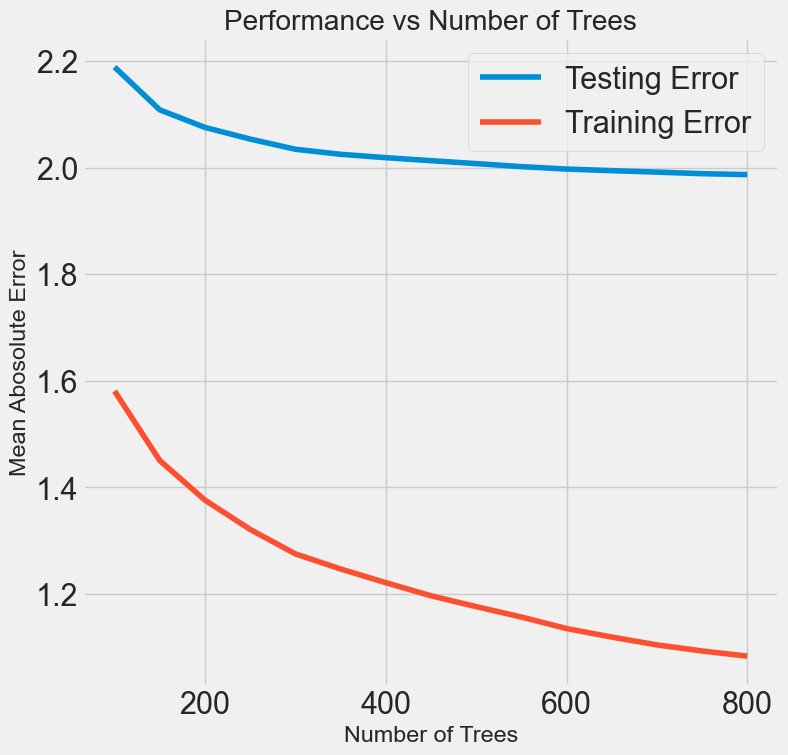

In [46]:
# Get the results into a dataframe
results = pd.DataFrame(grid_search.cv_results_)

# Plot the training and testing error vs number of trees
figsize(8, 8)
plt.style.use('fivethirtyeight')
plt.plot(results['param_n_estimators'], -1 * results['mean_test_score'], label = 'Testing Error')
plt.plot(results['param_n_estimators'], -1 * results['mean_train_score'], label = 'Training Error')
plt.xlabel('Number of Trees'); plt.ylabel('Mean Abosolute Error'); plt.legend()
plt.title('Performance vs Number of Trees')

In [47]:
results.sort_values('mean_test_score', ascending = False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
14,25.517358,0.059487,0.016136,0.000423,800,{'n_estimators': 800},-2.069697,-1.973455,-1.962245,-1.942720,-1.987029,0.048979,1,-1.118426,-1.095304,-1.075706,-1.042907,-1.083086,0.027690
13,25.671943,0.097008,0.015890,0.001058,750,{'n_estimators': 750},-2.071467,-1.974519,-1.965484,-1.943588,-1.988764,0.049055,2,-1.129148,-1.102137,-1.085590,-1.054174,-1.092762,0.027167
12,25.306036,0.216459,0.016452,0.001713,700,{'n_estimators': 700},-2.076279,-1.977729,-1.969816,-1.943057,-1.991720,0.050482,3,-1.142938,-1.114692,-1.096844,-1.062243,-1.104179,0.029263
11,23.151721,0.110656,0.016438,0.003095,650,{'n_estimators': 650},-2.079524,-1.981380,-1.972784,-1.944197,-1.994471,0.050998,4,-1.160567,-1.123904,-1.119494,-1.071501,-1.118867,0.031655
10,21.225466,0.082182,0.012951,0.000471,600,{'n_estimators': 600},-2.081137,-1.986057,-1.979262,-1.943371,-1.997456,0.050962,5,-1.178543,-1.137619,-1.139872,-1.083525,-1.134890,0.033824


From this plot, it appears that our model is slightly [overfitting](https://elitedatascience.com/overfitting-in-machine-learning)! The training error is significantly lower than the testing error, which shows that the model is learning the training data very well but then is not able to generalize to the test data as well. Moveover, as the number of trees increases, the amount of overfitting increases. Both the test and training error decrease as the number of trees increase but the training error decreases more rapidly. 

There will always be a difference between the training error and testing error (the training error is always lower) but if there is a significant difference, we want to try and reduce overfitting, either by getting more training data or reducing the complexity of the model through hyperparameter tuning or regularization. [For the gradient boosting regressor](https://www.quora.com/How-do-you-correct-for-overfitting-for-a-Gradient-Boosted-Machine), some options include reducing the number of trees, reducing the max depth of each tree, and increasing the minimum number of samples in a leaf node. For anyone who wants to go further into the gradient boosting regressor, [here is a great article.](http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/) For now, we will use the model with the best performance and accept that it may be overfitting to the training set. 

Based on the cross validation results, the best model using 800 trees and achieves a cross validation error under 9. This indicates that the average cross-validation estimate of the Energy Star Score is within 9 points of the true answer! 

# Evaluate Final Model on the Test Set

We will use the best model from hyperparameter tuning to make predictions on the testing set. Remember, our model has never seen the test set before, so this performance should be a good indicator of how the model would perform if deployed in the real world. 

For comparison, we can also look at the performance of the default model. The code below creates the final model, trains it (with timing), and evaluates on the test set. 

In [48]:
# Default model
default_model = GradientBoostingRegressor(random_state = 42)

# Select the best model
final_model = grid_search.best_estimator_

final_model

GradientBoostingRegressor(loss='absolute_error', max_depth=5,
                          min_samples_leaf=6, min_samples_split=6,
                          n_estimators=800, random_state=42)

In [49]:
%%timeit -n 1 -r 5
default_model.fit(X, y)

2.23 s ± 24.5 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [50]:
default_pred = default_model.predict(X_test)
final_pred = final_model.predict(X_test)

print('Default model performance on the test set: MAE = %0.4f.' % mae(y_test, default_pred))
print('Final model performance on the test set:   MAE = %0.4f.' % mae(y_test, final_pred))

Default model performance on the test set: MAE = 2.8774.
Final model performance on the test set:   MAE = 1.8255.


The final model does out-perform the baseline model by about 35%! Machine learning is often a field of tradeoffs: bias vs variance, acccuracy vs interpretability, accuracy vs running time, and the final decision of which model to use depends on the situation. Here, the increase in run time is not an impediment, because while the relative difference is large, the absolute magnitude of the training time is not significant. In a different situation, the balance might not be the same so we would need to consider what we are optimizing for and the limitations we have to work with. 

To get a sense of the predictions, we can plot the distribution of true values on the test set and the predicted values on the test set. 

In [51]:
# Clip predictions to the valid range [1, 100]
final_pred = np.clip(final_pred, 1, 100)

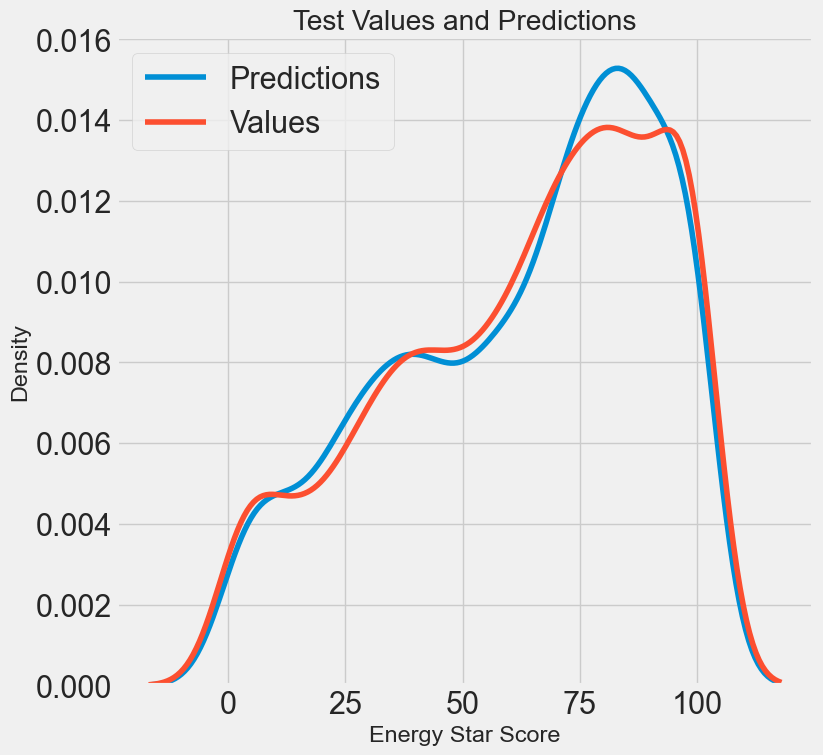

In [52]:
fig = plt.figure(figsize=(8, 8))

# Density plot of the final predictions and the test values
sns.kdeplot(final_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')

# Label the plot
plt.xlabel('Energy Star Score'); plt.ylabel('Density');
plt.title('Test Values and Predictions');
plt.legend();

The distribution looks to be nearly the same although the density of the predicted values is closer to the median of the test values rather than to the actual peak at 100. It appears the model might be less accurate at predicting the extreme values and instead predicts values closer to the median. 

Another diagnostic plot is a histogram of the residuals. Ideally, we would hope that the residuals are normally distributed, meaning that the model is wrong the same amount in both directions (high and low). 

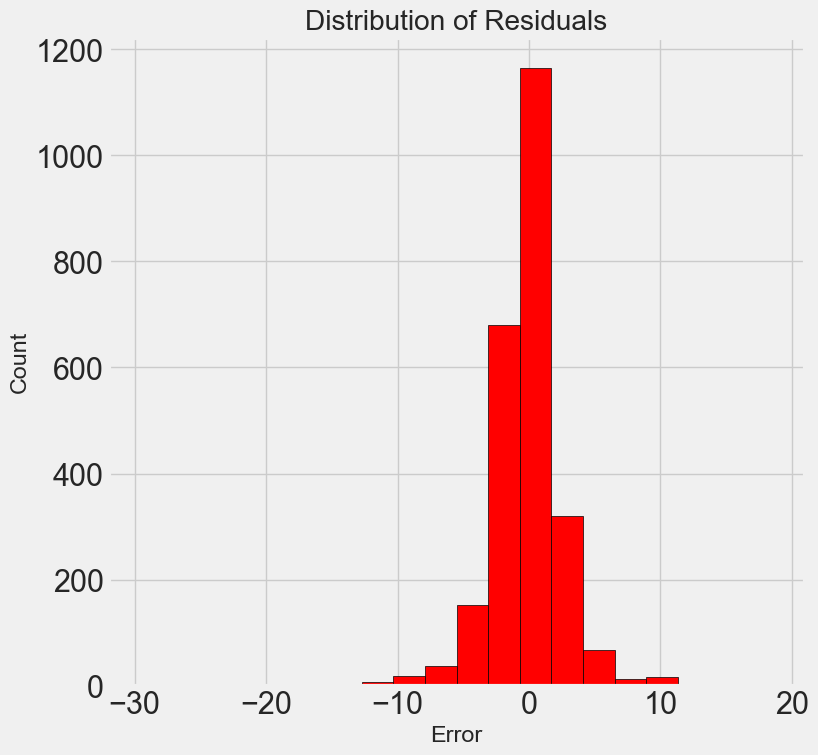

In [53]:
figsize = (6, 6)

# Calculate the residuals 
residuals = final_pred - y_test

# Plot the residuals in a histogram
plt.hist(residuals, color = 'red', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');

The residuals are close to normally disributed, with a few noticeable outliers on the low end. These indicate errors where the model estimate was far below that of the true value. 

# Conclusions

In this notebook, we covered crucial concepts in the machine learning pipeline:

* Imputing missing values
* Evaluating and comparing several machine learning methods
* Hyperparameter tuning a machine learning model using random search and cross validation
* Evaluating the best model on the testing set

The results showed us that machine learning is applicable to our problem, with the final model able to the predict the Energy Star Score of a building to within 9.1 points. We also saw that hyperparamter tuning was able to improve the performance of the model although at a considerable cost in terms of time invested. This is a good reminder that proper feature engineering and gathering more data (if possible!) has a much larger pay-off than fine-tuning the model. We also observed the trade-off in run-time versus accuracy, which is one of many considerations we have to take into account when designing machine learning models. 

We know our model is accurate, but do we know why it makes the predictions it does? The next step in the machine learning process is crucial: trying to understand how the model makes predictions. Achieveing high accuracy is great, but it would also be helpful if we could figure out why the model is able to predict accurately so we could use this information to better understand the problem. For example, what features does the model rely on to infer the Energy Star Score? It is possible to use this model for feature selection and implement a simpler model that is more interpretable? 

In the final notebook, we will try to answer these questions and draw final conclusions from the project!